# Comparison impedance of simple.xmen  

In [1]:
pwd()

"/home/yoshinobu/MEGA/develop/calcimp.jl/test"

Read C version simle.imp

In [10]:
using DataFrames
using Plots
using StatPlots
using CSV

pyplot()

┌ Info: Precompiling StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1186


Plots.PyPlotBackend()

In [7]:
cdat = CSV.read("../sample/simple.imp");

In [8]:
head(cdat)

,freq,imp.real,imp.imag,mag
1,0.0,0.0,0.0,0.0
2,2.5,3.20225,22.4761,27.1217
3,5.0,4.79165,42.9347,32.7099
4,7.5,6.07926,63.2161,36.0565
5,10.0,7.24141,83.5969,38.4763
6,12.5,8.35513,104.245,40.3889


In [15]:
rename!(cdat, Symbol("imp.real")=>:rel, Symbol("imp.imag")=>:img);

ErrorException: Tried renaming imp.real to rel, when rel already exists in the Index.

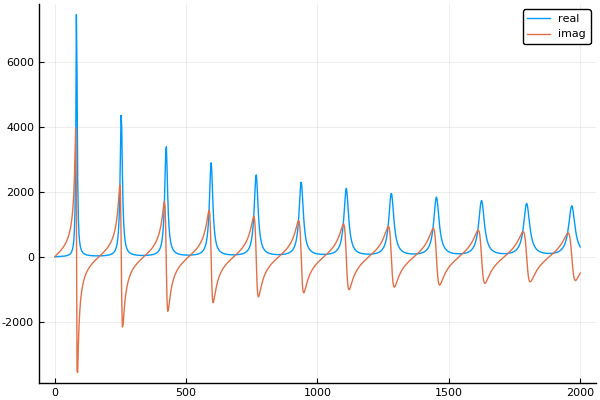

In [17]:
@df cdat plot(:freq, [:rel, :img], label = ["real" "imag"])

In [18]:
jdat = CSV.read("simple_julia.imp");

In [19]:
head(jdat)

,freq,real,imag,mag
1,0.0,0.0,0.0,-Inf
2,2.5,3.20225,22.4761,27.1217
3,5.0,4.79165,42.9347,32.7099
4,7.5,6.07926,63.2161,36.0565
5,10.0,7.24141,83.5969,38.4763
6,12.5,8.35513,104.245,40.3889


It seems data by Julia and C are exactly same.

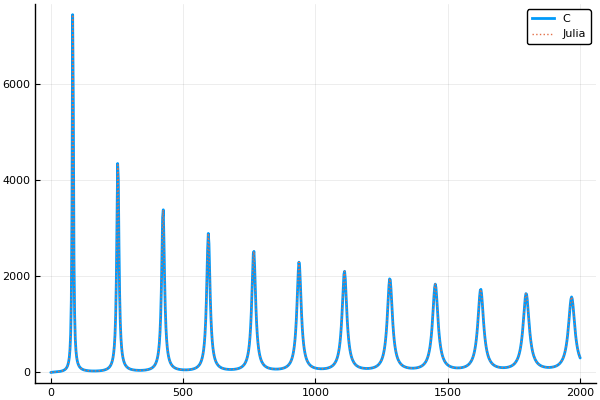

In [21]:
plot(cdat[:freq], [cdat[:rel], jdat[:real]], label = ["C" "Julia"], line = [:solid :dot], w = [2 1])

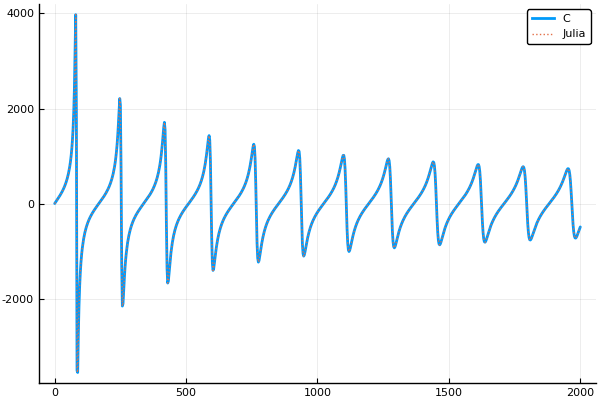

In [22]:
plot(cdat[:freq], [cdat[:img], jdat[:imag]], label = ["C" "Julia"], line = [:solid :dot], w = [2 1])

OK